In [1]:
!python -V

Python 3.12.11


# Q1. Install MLflow

In [ ]:
%%cmd
mlflow --version

Microsoft Windows [Version 10.0.26100.4351]
(c) Microsoft Corporation. All rights reserved.

(mlops-zoomcamp-epam) c:\Users\Daniel\Documents\mlops-zoomcamp-epam\02-experiment-tracking>mlflow --version


mlflow, version 3.1.1

(mlops-zoomcamp-epam) c:\Users\Daniel\Documents\mlops-zoomcamp-epam\02-experiment-tracking>

# Q2. Download and preprocess the data

In [ ]:
%%bash
# Downloading requrired trip data
URLS=(
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet"
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet"
)

for url in "${URLS[@]}"; do
    file="../data/${url##*/}"
    if [ ! -f "$file" ]; then
        echo "Downloading ${url##*/}..."
        wget "$url" -P ../data/
    else
        echo "${url##*/} exists"
    fi
done

green_tripdata_2023-01.parquet exists
green_tripdata_2023-02.parquet exists
green_tripdata_2023-03.parquet exists


In [14]:
%%bash
# downloading all files from homework folder
for url in $(curl -s "https://api.github.com/repos/DataTalksClub/mlops-zoomcamp/contents/cohorts/2025/02-experiment-tracking/homework?ref=69c437e433315e19587233d62cc8b8941459787c" | grep '"download_url":' | cut -d '"' -f 4); do
  file="./${url##*/}"
    if [ ! -f "$file" ]; then
        echo "Downloading ${url##*/}..."
        wget "$url"
    else
        echo "${url##*/} exists"
    fi
done

hpo.py exists
preprocess_data.py exists
register_model.py exists
train.py exists


In [15]:
%run preprocess_data.py --raw_data_path "../data" --dest_path ./output

# Q3. Train a model with autolog

In [24]:
%run train.py --data_path ./output

2025/07/01 06:58:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/07/01 06:59:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


In [ ]:
import mlflow
from mlflow.tracking import MlflowClient
client = mlflow.client.MlflowClient()
# Why on earth I can't search if parameter exists or not https://github.com/mlflow/mlflow/issues/2922
# Simplest way would be just to rely on default sort for now
experiment_id = client.get_experiment_by_name("homework-nyc-taxi").experiment_id
parameter = client.search_runs(experiment_ids=experiment_id)[0]
parameter.data.params.get("min_samples_split")

'2'

# Q4. Launch the tracking server locally
`--default-artifact-root`

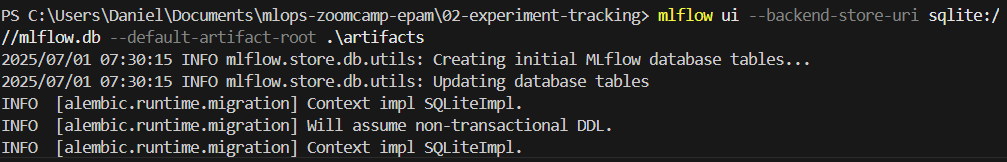
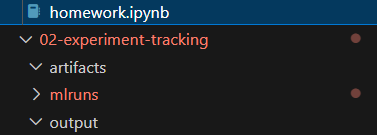

# Q5. Tune model hyperparameters


In [84]:
%run hpo.py

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

2025/07/01 08:05:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run adorable-hound-508 at: http://127.0.0.1:5000/#/experiments/3/runs/42d9e4c89f524e188c6dc047a60bcfa5

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3

  7%|▋         | 1/15 [00:17<04:00, 17.15s/trial, best loss: 5.370086069268862]

2025/07/01 08:05:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run righteous-stoat-422 at: http://127.0.0.1:5000/#/experiments/3/runs/d04271ff1c1c421dbdf0124364c4e1a2

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 13%|█▎        | 2/15 [00:26<02:41, 12.46s/trial, best loss: 5.370086069268862]

2025/07/01 08:05:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run monumental-sheep-567 at: http://127.0.0.1:5000/#/experiments/3/runs/563ebb237abc4566a43252f6f27377fc

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 20%|██        | 3/15 [00:35<02:10, 10.91s/trial, best loss: 5.370086069268862]

2025/07/01 08:05:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run glamorous-fly-106 at: http://127.0.0.1:5000/#/experiments/3/runs/72bf1aabe0384682ab7f2271b5300ebd

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 27%|██▋       | 4/15 [00:48<02:11, 11.93s/trial, best loss: 5.357490752366866]

2025/07/01 08:06:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run righteous-lark-314 at: http://127.0.0.1:5000/#/experiments/3/runs/4cc202991eba4373b9d28d242928cdb8

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 33%|███▎      | 5/15 [00:59<01:55, 11.55s/trial, best loss: 5.357490752366866]

2025/07/01 08:06:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run chill-shoat-951 at: http://127.0.0.1:5000/#/experiments/3/runs/8bc27512837d4c828c838bb4c816f92c

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 40%|████      | 6/15 [01:17<02:01, 13.54s/trial, best loss: 5.35469507253029] 

2025/07/01 08:06:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run thundering-colt-940 at: http://127.0.0.1:5000/#/experiments/3/runs/733ed8a6ff6c4b748a2a76f39258526c

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                  

 47%|████▋     | 7/15 [01:34<01:57, 14.72s/trial, best loss: 5.35469507253029]

2025/07/01 08:06:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run gifted-hawk-177 at: http://127.0.0.1:5000/#/experiments/3/runs/b5c20c0c6e7f4498be2714bd5612d897

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                  

 53%|█████▎    | 8/15 [01:43<01:31, 13.04s/trial, best loss: 5.35469507253029]

2025/07/01 08:07:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run gregarious-crane-989 at: http://127.0.0.1:5000/#/experiments/3/runs/1ad2977644b6465dbb4410b8c8bd17eb

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                  

 60%|██████    | 9/15 [01:57<01:19, 13.27s/trial, best loss: 5.35469507253029]

2025/07/01 08:07:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run placid-gnat-935 at: http://127.0.0.1:5000/#/experiments/3/runs/29f07514dedb48fdb7bdb1eb93031a3a

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                  

 67%|██████▋   | 10/15 [02:10<01:05, 13.08s/trial, best loss: 5.35469507253029]

2025/07/01 08:07:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run thoughtful-carp-346 at: http://127.0.0.1:5000/#/experiments/3/runs/8eb71aed7e7743c097b1b4565093fc15

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                   

 73%|███████▎  | 11/15 [02:21<00:50, 12.57s/trial, best loss: 5.335419588556921]

2025/07/01 08:07:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run useful-goat-838 at: http://127.0.0.1:5000/#/experiments/3/runs/09178520c10947caa1b247e3e42f7ca7

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

 80%|████████  | 12/15 [02:32<00:36, 12.17s/trial, best loss: 5.335419588556921]

2025/07/01 08:07:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run clumsy-jay-647 at: http://127.0.0.1:5000/#/experiments/3/runs/2e81064d8d264b5ca4ef8bb387c806da

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

 87%|████████▋ | 13/15 [02:42<00:22, 11.31s/trial, best loss: 5.335419588556921]

2025/07/01 08:08:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run indecisive-pug-33 at: http://127.0.0.1:5000/#/experiments/3/runs/12be16f77b13499d85edf9b67db225ed

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

 93%|█████████▎| 14/15 [02:53<00:11, 11.38s/trial, best loss: 5.335419588556921]

2025/07/01 08:08:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.



🏃 View run entertaining-owl-76 at: http://127.0.0.1:5000/#/experiments/3/runs/84185d41052e433dbe581f5069110dd3

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

100%|██████████| 15/15 [03:07<00:00, 12.47s/trial, best loss: 5.335419588556921]


In [ ]:
# Solution 1 - getting exact rmse value.
experiment_id = client.get_experiment_by_name("random-forest-hyperopt").experiment_id
runs = client.search_runs(experiment_ids=experiment_id, order_by=["metrics.rmse ASC"])
print(runs[0].data.metrics.get("rmse"))

# Optional: Solution 2 - getting list of rmse values. idk, I think IRL it maybe useful
# to collect the list of rmse values for analytics, instead just grabbing top one

# rmse_values = [run.data.metrics.get("rmse") for run in runs]
# rmse_values.sort()
# print(rmse_values[0])


5.335419588556921


# Q6. Promote the best model to the model registry

``` python
# Select the model with the lowest test RMSE
experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
best_run = client.search_runs(experiment_ids=experiment, order_by=["metrics.rmse ASC"])[0]
run_id = best_run.info.run_id

model_id = client.get_run(run_id).outputs.model_outputs[0].model_id
model_uri = client.get_logged_model(model_id).model_uri

# Register the best model
mlflow.register_model(model_uri, name="glados")
```

In [130]:
%run register_model.py --data_path ./output --top_n 5

2025/07/01 09:33:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run ambitious-asp-729 at: http://127.0.0.1:5000/#/experiments/4/runs/ee55350a90fd456db3b4ee1cb158effb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


2025/07/01 09:34:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run handsome-shark-136 at: http://127.0.0.1:5000/#/experiments/4/runs/6ce0abc7f0694eb0b86fc88b551e8551
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


2025/07/01 09:34:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run polite-smelt-622 at: http://127.0.0.1:5000/#/experiments/4/runs/c5121d53f3fb48ab84bbc07c16421316
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


2025/07/01 09:34:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run likeable-tern-165 at: http://127.0.0.1:5000/#/experiments/4/runs/350363545d794033b1e2e03ae227dfae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


2025/07/01 09:35:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run nervous-skunk-821 at: http://127.0.0.1:5000/#/experiments/4/runs/e4cd5d52d5514b3e84feb0df31f50089
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


Successfully registered model 'glados'.
2025/07/01 09:35:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: glados, version 1
Created version '1' of model 'glados'.


In [131]:
EXPERIMENT_NAME = "random-forest-best-models"    
experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
best_run = client.search_runs(experiment_ids=experiment.experiment_id, order_by=["metrics.test_rmse ASC"])[0]
print(best_run.data.metrics.get("test_rmse"))

5.567408012462019
